In [1]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import time

In [2]:
# 读取数据
df = pd.read_csv('./datas/household_power_consumption_1000.txt', sep=';')
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [3]:
# 数据预处理 
df.dropna(axis=0, how='any', inplace=True)    # axis=0 删除行，

In [4]:
# 取出所需数据 电压和功率， 功率为特征属性，电流为目标属性
X = df.iloc[:, 2:4]
Y = df.iloc[:, 5]
print(X.head())
print(Y.head(2))

   Global_active_power  Global_reactive_power
0                4.216                  0.418
1                5.360                  0.436
2                5.374                  0.498
3                5.388                  0.502
4                3.666                  0.528
0    18.4
1    23.0
Name: Global_intensity, dtype: float64


In [5]:
# 数据标准化处理，使用
def stand(ser, mean1, mean2, std1, std2):
    """
    数据的标准化处理，接收一个series
    接收目标数据，数据的平均值，标准差，
    return: series
    """
    return ((ser[0] - mean1)/std1, (ser[1] - mean2)/std2)
    

In [94]:
X = X.apply(
    lambda x: pd.Series(stand(
            x,
            X.mean()["Global_active_power"], 
            X.mean()["Global_reactive_power"], 
            X.std()["Global_active_power"],
            X.std()["Global_reactive_power"]
            )
        ),
    axis=1
    )


In [82]:
# 将数据集拆分为测试集和训练集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [95]:
# 将数据转化为矩阵的形式
X = np.mat(X_train)
Y = np.mat(Y_train).T

In [97]:
# 计算系数值
theta = (X.T * X).I * X.T * Y
print(theta)

[[ 64.9570137 ]
 [432.87967245]]


In [98]:
# 对测试结合进行预测
y_predict = np.mat(X_test) * theta

In [79]:
plt.rcParams['font.sans-serif']=[u'simHei']
plt.rcParams['axes.unicode_minus']=False

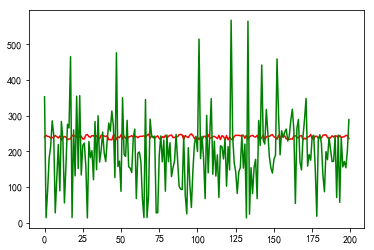

In [99]:
#  画图验证
t = np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, label='真实值', color='r')
plt.plot(t, y_predict, label='预测值', color='g')
plt.show()